Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
#reading data
df=pd.read_csv(r'D:\Data Science\data\fish.csv')

# see a small view on our data 


In [3]:
#see first 5 rows
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
# summary of dataframe
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
# There are null values ? 
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

We see that we don't have any missing values

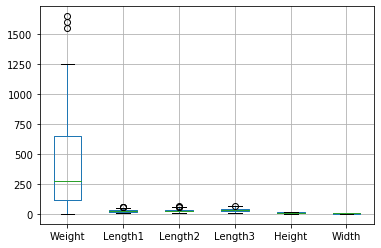

In [7]:
# See if there are outliers in data 
df.boxplot()

In [8]:
# We have some outliers Let's drop these outliers 
df1=df.iloc[:,1:]
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3-Q1
minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR
condition = (df1 <= maximum) & (df1 >= minimum)
condition = condition.all(axis=1)
df1=df1[condition]

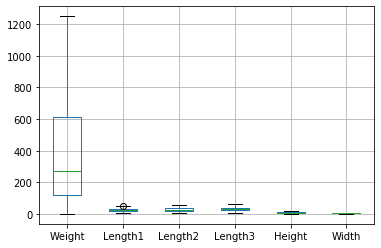

In [9]:
#Here we drop the outliers
df1.boxplot()

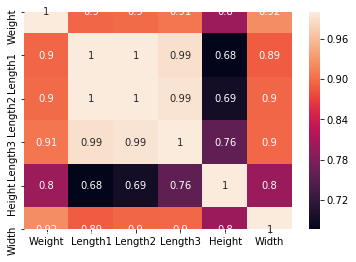

In [10]:
# Make heat map to see the corrleation
sns.heatmap(df1.corr(),annot=True)

In [11]:
#Here we select these 3 features from heatmap
x=df1[['Length1','Height','Width']]

In [12]:
#this is the predictor
y=df1[['Weight']]

#This time to make our model 

In [13]:
# split data into 4 variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [14]:
#import linear regression model
from sklearn.linear_model import LinearRegression

In [15]:
#fit train data 
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# predict
y_pred=reg.predict(X_test)

In [17]:
#accuarcy 
reg.score(X_test,y_test)

0.9009310933322988